In [ ]:
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(42)  # For reproducibility
data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=365, freq='D'),  # Changed periods to 365 to match other columns
    'Store_ID': np.random.randint(1, 5, 365),  # Random stores
    'Advertising': np.random.uniform(100, 500, 365),  # Ad spend
    'Sales': np.random.uniform(200, 1000, 365) + np.random.uniform(100, 500, 365) * 0.3 # Corrected typo: 'unifrom' to 'uniform'
})

print(data.head())

        Date  Store_ID  Advertising       Sales
0 2023-01-01         3   316.579190  669.955207
1 2023-01-02         4   378.313760  703.828700
2 2023-01-03         1   191.420009  938.628139
3 2023-01-04         3   169.981971  579.549954
4 2023-01-05         3   492.867337  909.449851


In [ ]:
# Set Data as index (useful for time-series analysis)
data.set_index('Date', inplace=True)

# Define features and target
X = data[['Store_ID', 'Advertising']]   # Features
y = data['Sales']                       # Target

In [ ]:
from sklearn.model_selection import train_test_split

# Changed 'train_test_split' to 'test_size'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict sales
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 69677.00421758837


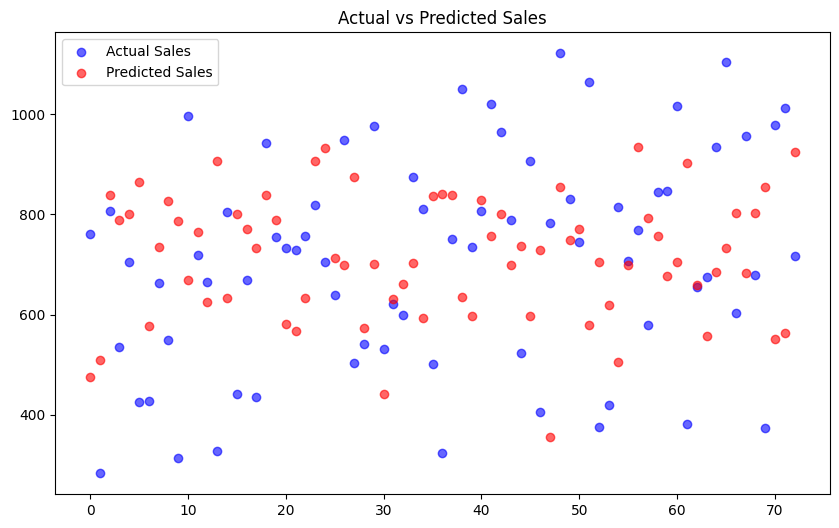

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, label='Actual Sales', color='blue', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Sales', color='red', alpha=0.6)
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.show()

In [ ]:
# Example: New data for predicitions
new_data = pd.DataFrame({
    'Store_ID': [1,2],
    'Advertising': [300, 450]
})

future_sales = model.predict(new_data)
print(f"Future Sales Predictions: {future_sales}")

Future Sales Predictions: [534.70320019 532.95041104]
